In [1]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
from sklearn_pandas import DataFrameMapper
from sklearn import metrics, datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_excel('BreastCancer.xlsx')
data.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [4]:
data.isna().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [5]:
data= data.dropna()

In [6]:
dataset = data[data['Outcome'] == 'R'] 

In [7]:
dataset.shape


(47, 35)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 4 to 196
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         47 non-null     int64  
 1   Outcome                    47 non-null     object 
 2   Time                       47 non-null     int64  
 3   radius_mean                47 non-null     float64
 4   texture_mean               47 non-null     float64
 5   perimeter_mean             47 non-null     float64
 6   area_mean                  47 non-null     float64
 7   smoothness_mean            47 non-null     float64
 8   compactness_mean           47 non-null     float64
 9   concavity_mean             47 non-null     float64
 10  concave_points_mean        47 non-null     float64
 11  symmetry_mean              47 non-null     float64
 12  fractal_dimension_mean     47 non-null     float64
 13  radius_std_dev             47 non-null     float64


In [9]:
dataset.isna().sum()
dataset = dataset.dropna()

In [10]:
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)

In [11]:
dataset = dataset.dropna()

In [22]:
dataset.describe()


,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,25.085106,18.396596,21.781915,121.603830,1089.597872,0.103147,0.142719,0.163169,0.093936,0.187860,...,29.588936,152.331915,1651.495745,0.145436,0.359219,0.442155,0.184783,0.313362,0.088740,3.461702
std,22.718341,3.359142,3.658725,22.926511,396.378098,0.010205,0.040964,0.062463,0.034450,0.020855,...,5.499719,32.786742,703.771798,0.019402,0.129717,0.146765,0.037959,0.060953,0.016601,2.008845
min,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,...,16.670000,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000
25%,9.000000,15.815000,19.225000,104.900000,800.950000,0.094145,0.113450,0.111550,0.068070,0.172250,...,26.150000,128.600000,1167.500000,0.130150,0.263900,0.326700,0.152900,0.270800,0.077080,2.400000
50%,16.000000,19.000000,21.490000,123.700000,1104.000000,0.103400,0.133900,0.165500,0.089940,0.186700,...,29.430000,146.000000,1483.000000,0.147200,0.354200,0.406900,0.184100,0.303200,0.088150,3.000000
75%,36.500000,20.290000,24.055000,133.700000,1289.500000,0.111750,0.166550,0.212000,0.109550,0.198300,...,33.010000,171.350000,1989.500000,0.160150,0.411150,0.537550,0.209000,0.339900,0.099895,4.000000
max,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,...,40.140000,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000


### We build three models here
#### 1. Baseline Model
#### 2. A model with a single attribute as the predictor.
#### 3. A model with basic feature engineering involved.

In [23]:
baseline_dataset = dataset
baseline_dataset = baseline_dataset.drop(['Time','Lymph_Node_Status'], axis = 1)

We begin by building a correlation heatmap amongst the attributes to check which attributes have a strong relationship with our response variable Time.

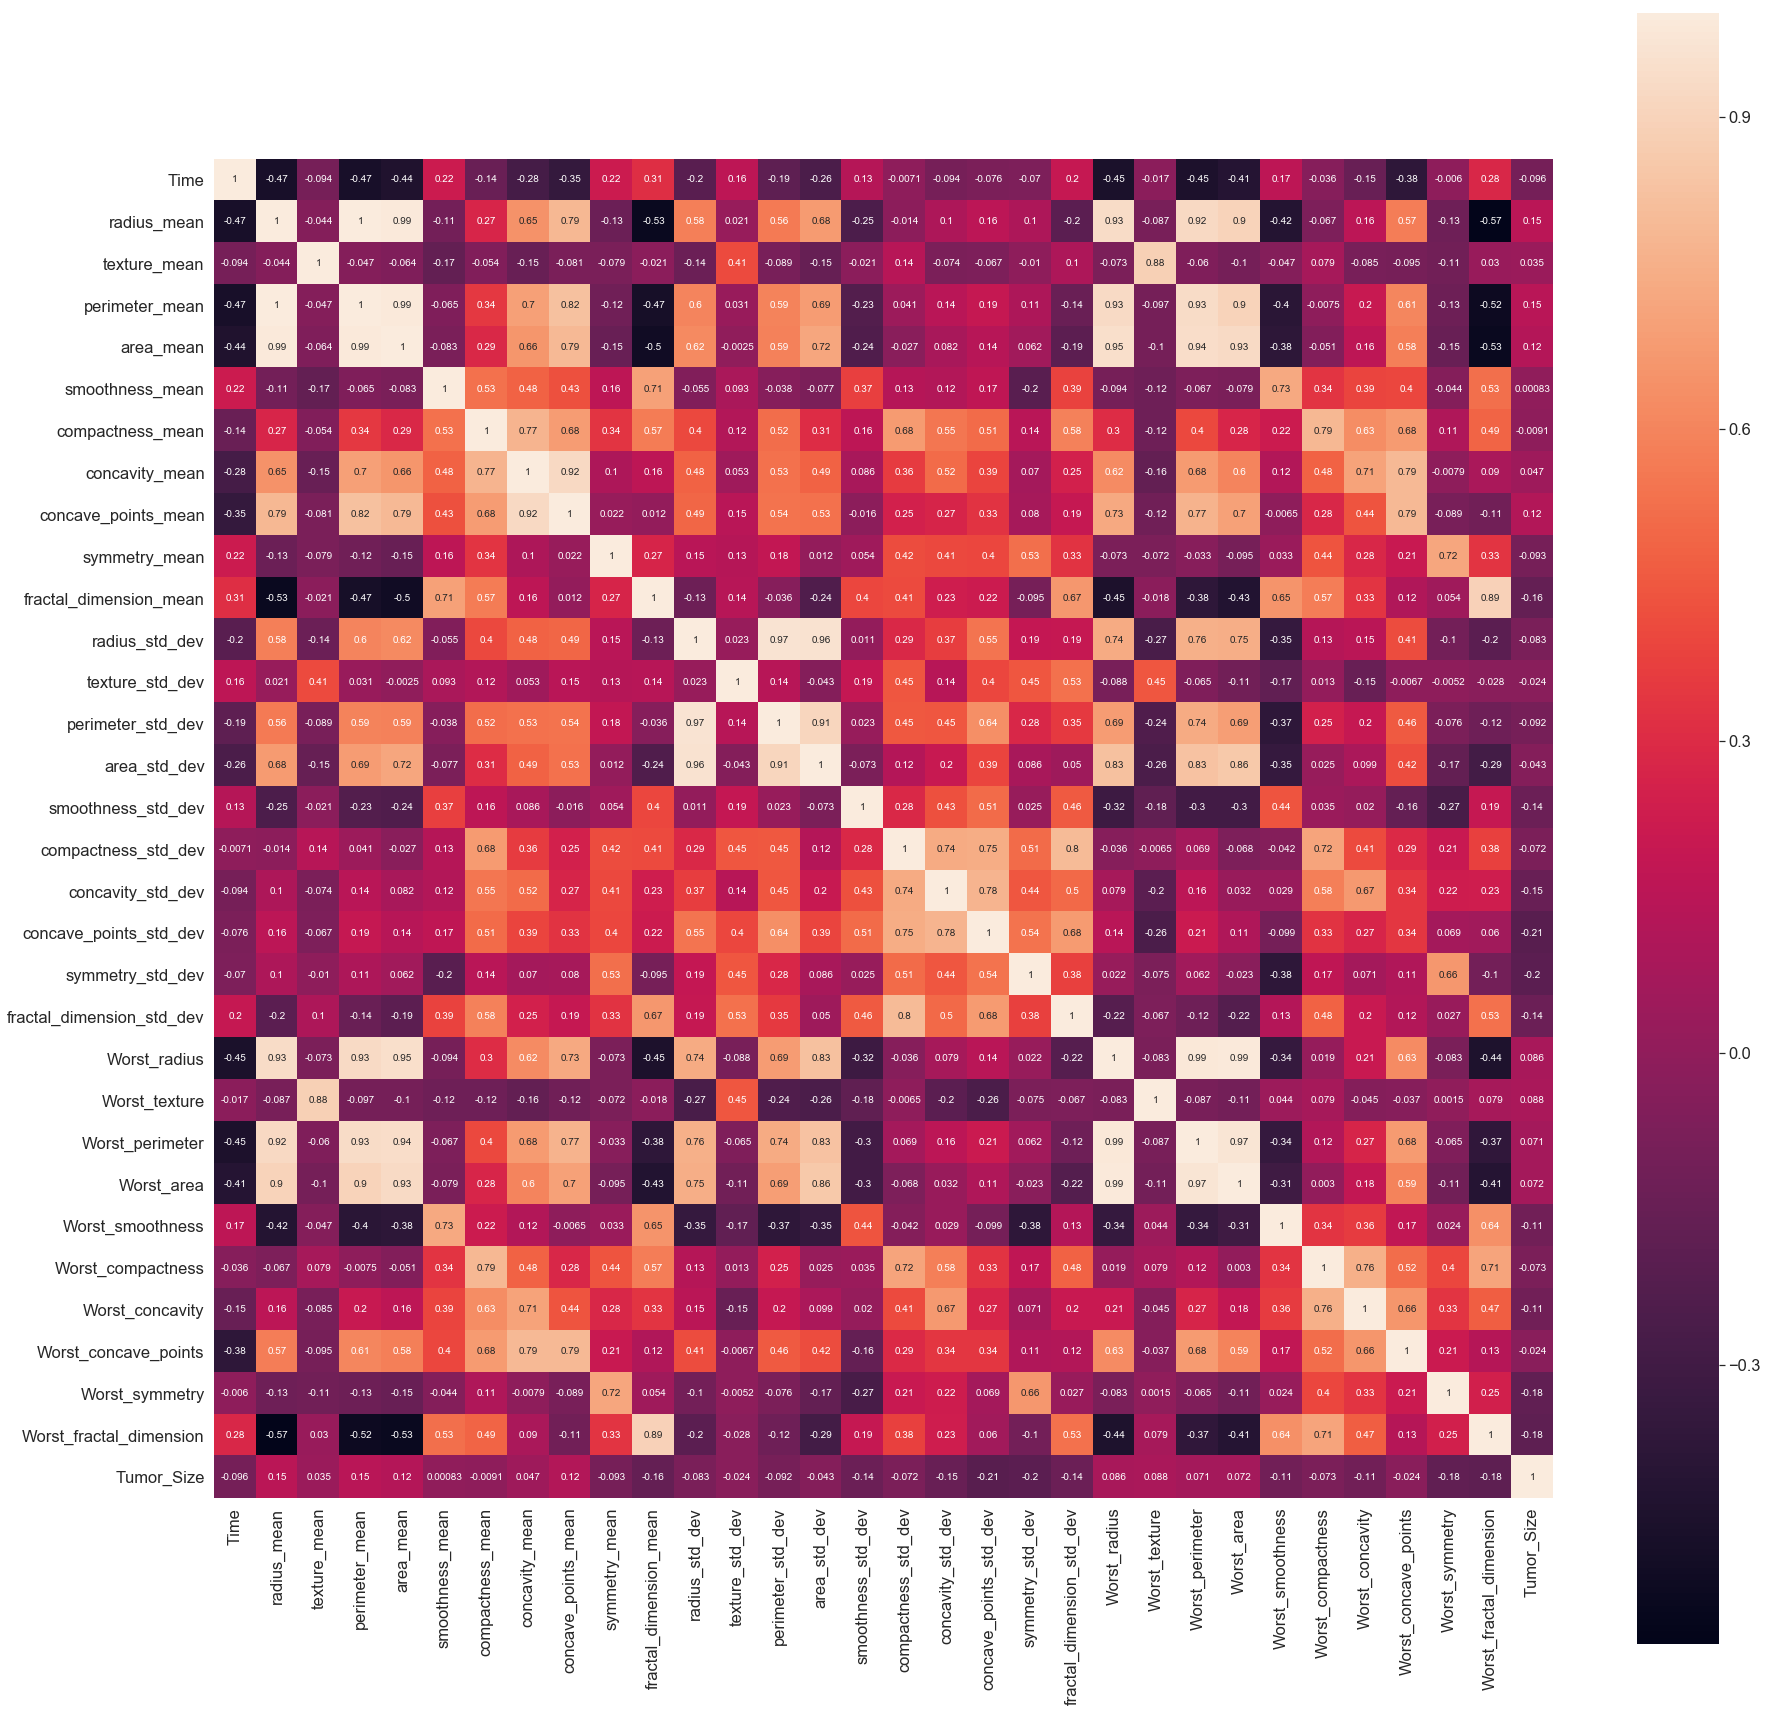

In [24]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})

For the single attribute, we choose Radius Mean as it is highly correlated(negative correlation) attribute with Time.

In [25]:
single_attribute_dataset = dataset[['radius_mean']]

In [26]:
drop_list = ['texture_mean', 'perimeter_mean', 'area_mean','compactness_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean',
             'radius_std_dev','perimeter_std_dev', 'area_std_dev', 'texture_std_dev', 'compactness_std_dev', 'smoothness_std_dev', 'concavity_std_dev', 'concave_points_std_dev', 'fractal_dimension_std_dev', 'symmetry_std_dev',
             'Worst_area','Worst_perimeter','Worst_compactness', 'Worst_concavity', 'Worst_fractal_dimension', 'Worst_symmetry',
             'Worst_concave_points','Worst_texture','Lymph_Node_Status', 'Tumor_Size']
feature_engineer_dataset = dataset.drop(drop_list,axis = 1 )
feature_engineer_dataset.head()

,Time,radius_mean,concave_points_mean,fractal_dimension_mean,Worst_radius,Worst_smoothness
4,27,20.29,0.10430,0.05883,22.54,0.1374
5,77,12.75,0.07666,0.07164,15.51,0.1706
7,77,13.71,0.05985,0.07451,17.06,0.1654
13,36,14.54,0.07364,0.07077,17.46,0.1678
15,10,16.13,0.10280,0.07356,20.96,0.1789


We will also standardize all the features

In [27]:
labels = feature_engineer_dataset.pop('Time')
mapper = DataFrameMapper([(feature_engineer_dataset.columns, StandardScaler())])
scaled_features = mapper.fit_transform(feature_engineer_dataset.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=feature_engineer_dataset.index, columns=feature_engineer_dataset.columns)

In [28]:
scaled_features_df.describe()

,radius_mean,concave_points_mean,fractal_dimension_mean,Worst_radius,Worst_smoothness
count,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01
mean,-1.417306e-16,3.779483e-17,7.984157e-16,8.503836e-16,1.927536e-15
std,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00,1.010811e+00
min,-1.822512e+00,-1.777959e+00,-1.779123e+00,-1.557559e+00,-2.257794e+00
25%,-7.768371e-01,-7.589422e-01,-7.877815e-01,-6.387763e-01,-7.964023e-01
50%,1.815725e-01,-1.172521e-01,-6.974593e-02,-1.628061e-01,9.189470e-02
75%,5.697510e-01,4.581271e-01,6.191801e-01,5.773542e-01,7.665836e-01
max,2.655082e+00,2.856763e+00,2.144197e+00,2.639535e+00,2.066467e+00


## Building the Linear Regression Models

In [29]:
def build_and_evaluate_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    print('Coefficients: \n', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("The labels: \n", np.array(y_test).astype(int))
    print("The predicted values are: \n", y_pred.astype(int))

### The Baseline Model

In [30]:
build_and_evaluate_model(baseline_dataset, labels)

Coefficients: 
 [ 2.44896317e+02  5.99948114e-02 -3.14312112e+01 -9.91670126e-02
  2.79671709e+03  2.00517904e+03  1.51723311e+03 -3.11760506e+03
 -2.18560547e+02 -1.13142013e+04 -8.69187817e+02 -4.95576616e+00
  1.54829053e+02 -4.06311486e-02 -4.31091476e+03 -3.78279406e+03
  3.69345381e+01  6.00770101e+03  2.64183448e+02 -7.70150454e+03
 -1.15772403e+01  1.96609000e+00 -9.46889700e+00  3.74588351e-01
  3.60866588e+02  1.08145904e+02 -1.84945441e+02 -3.71914071e+02
 -1.07718346e+02  3.43973406e+03  3.27032565e-01]
Mean squared error: 6126.09
The labels: 
 [ 5  9 37  7 39  1 26  8 10 12]
The predicted values are: 
 [ 28  28 -36 229  -7   0  20   2   9 -46]


## A single predictor model

In [31]:
build_and_evaluate_model(single_attribute_dataset, labels)

Coefficients: 
 [-3.28041547]
Mean squared error: 255.81
The labels: 
 [ 5  9 37  7 39  1 26  8 10 12]
The predicted values are: 
 [16 23 31  7 20 21 42 23 34 30]


### Model 3 - A feature engineered model

In [32]:
build_and_evaluate_model(feature_engineer_dataset, labels)

Coefficients: 
 [-7.71215908e-01 -4.33205850e+01  1.17523580e+03 -1.20406301e+00
 -1.91971116e+02]
Mean squared error: 313.26
The labels: 
 [ 5  9 37  7 39  1 26  8 10 12]
The predicted values are: 
 [21 17 21  1 15 19 45 19 38 29]
